In [1]:
from warnings import filterwarnings
from pathlib import Path
import os.path
import random
import glob
import os

from folium.plugins import HeatMap, HeatMapWithTime
from mpl_toolkits.mplot3d import Axes3D, art3d
import matplotlib.animation as animation
from scipy.io.wavfile import read, write
from IPython.display import Audio
import matplotlib.cm as mtpltcm
import matplotlib.pyplot as plt
from IPython.display import HTML
from scipy.fft import fftshift
from netCDF4 import Dataset
from folium import plugins
import cartopy.crs as ccrs
import matplotlib as mpl
from scipy import signal
import librosa.display
import seaborn as sns
import pandas as pd
import numpy as np
import skimage
import IPython
import folium
import pydub
import scipy
import PIL
import cv2

%matplotlib inline
filterwarnings('ignore', category = DeprecationWarning)
filterwarnings('ignore', category = RuntimeWarning)
filterwarnings('ignore', category = FutureWarning)
filterwarnings('ignore', category = UserWarning)

plt.style.use('dark_background')

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/Radar'

_2018_radar = Dataset(f'{DATA_PATH}/2018/tavg1_2d_ocn_Nx-202109201458output.17833.webform.nc4')
_2021_radar = Dataset(f'{DATA_PATH}/2021/tavg1_2d_ocn_Nx-202109201500output.18042.webform.nc4')

In [3]:
_2018_radar.variables.keys()

dict_keys(['time', 'longitude', 'latitude', 'tdrop', 'tbar', 'tskinice', 'rainocn', 'delts'])

In [4]:
GENERAL_KEY_LIST = ['tdrop', 'tbar', 'tskinice', 'rainocn', 'delts']
YEAR_NAME_LIST   = ['2018', '2021']

In [5]:
for idx, param in enumerate(GENERAL_KEY_LIST, 1):
    
    print(f'[{idx}]. {param}')
    print('- dimensions : ', _2018_radar.variables[param].dimensions)
    print('- long name  : ', _2018_radar.variables[param].long_name)
    print('- data type  : ', _2018_radar.variables[param].datatype)
    print(f'\n[ data summary ]\n {_2018_radar.variables[param]}')
    print('=='*30, '\n')

[1]. tdrop
- dimensions :  ('time', 'latitude', 'longitude')
- long name  :  temperature_drop_across_cool_layer
- data type  :  float32

[ data summary ]
 <class 'netCDF4._netCDF4.Variable'>
float32 tdrop(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: temperature_drop_across_cool_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used

[2]. tbar
- dimensions :  ('time', 'latitude', 'longitude')
- long name  :  mean_temperature_of_interface_layer
- data type  :  float32

[ data summary ]
 <class 'netCDF4._netCDF4.Variable'>
float32 tbar(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: mean_temperature_of_interface_layer
    units: 
    grid_name: grid01
    grid_type: linear
    level_desc

In [6]:
_2018_LON      = _2018_radar.variables['longitude'][:]
_2018_LAT      = _2018_radar.variables['latitude'][:]
_2018_TIME     = _2018_radar.variables['time'][:]
_2018_TBAR     = _2018_radar.variables['tbar'][0, :, :]
_2018_DELTS    = _2018_radar.variables['delts'][0, :, :]
_2018_TDROP    = _2018_radar.variables['tdrop'][0, :, :]
_2018_RAINOCN  = _2018_radar.variables['rainocn'][0, :, :]
_2018_TSKINICE = _2018_radar.variables['tskinice'][0, :, :]

In [7]:
_2021_LON      = _2021_radar.variables['longitude'][:]
_2021_LAT      = _2021_radar.variables['latitude'][:]
_2021_TIME     = _2021_radar.variables['time'][:]
_2021_TBAR     = _2021_radar.variables['tbar'][0, :, :]
_2021_DELTS    = _2021_radar.variables['delts'][0, :, :]
_2021_TDROP    = _2021_radar.variables['tdrop'][0, :, :]
_2021_RAINOCN  = _2021_radar.variables['rainocn'][0, :, :]
_2021_TSKINICE = _2021_radar.variables['tskinice'][0, :, :]

In [8]:
LAT_TDROP_2018    = _2018_TDROP[:, 0]
LON_TDROP_2018    = _2018_TDROP[0, :]

LAT_TBAR_2018     = _2018_TBAR[:, 0]
LON_TBAR_2018     = _2018_TBAR[0, :]

LAT_DELTS_2018    = _2018_DELTS[:, 0]
LON_DELTS_2018    = _2018_DELTS[0, :]

LAT_TSKINICE_2018 = _2018_TDROP[:, 0]
LON_TSKINICE_2018 = _2018_TDROP[0, :]

LAT_RAINOCN_2018  = _2018_RAINOCN[:, 0]
LON_RAINOCN_2018  = _2018_RAINOCN[0, :]

In [9]:
LAT_TDROP_2021    = _2021_TDROP[:, 0]
LON_TDROP_2021    = _2021_TDROP[0, :]

LAT_TBAR_2021     = _2021_TBAR[:, 0]
LON_TBAR_2021     = _2021_TBAR[0, :]

LAT_DELTS_2021    = _2021_DELTS[:, 0]
LON_DELTS_2021    = _2021_DELTS[0, :]

LAT_TSKINICE_2021 = _2021_TDROP[:, 0]
LON_TSKINICE_2021 = _2021_TDROP[0, :]

LAT_RAINOCN_2021  = _2021_RAINOCN[:, 0]
LON_RAINOCN_2021  = _2021_RAINOCN[0, :]

In [10]:
GENERAL_PARAMS_2018 = [_2018_TDROP  ,  _2018_TBAR, _2018_TSKINICE,
                       _2018_RAINOCN, _2018_DELTS]

GENERAL_PARAMS_2021 = [_2021_TDROP  ,  _2021_TBAR, _2021_TSKINICE,
                       _2021_RAINOCN, _2021_DELTS]

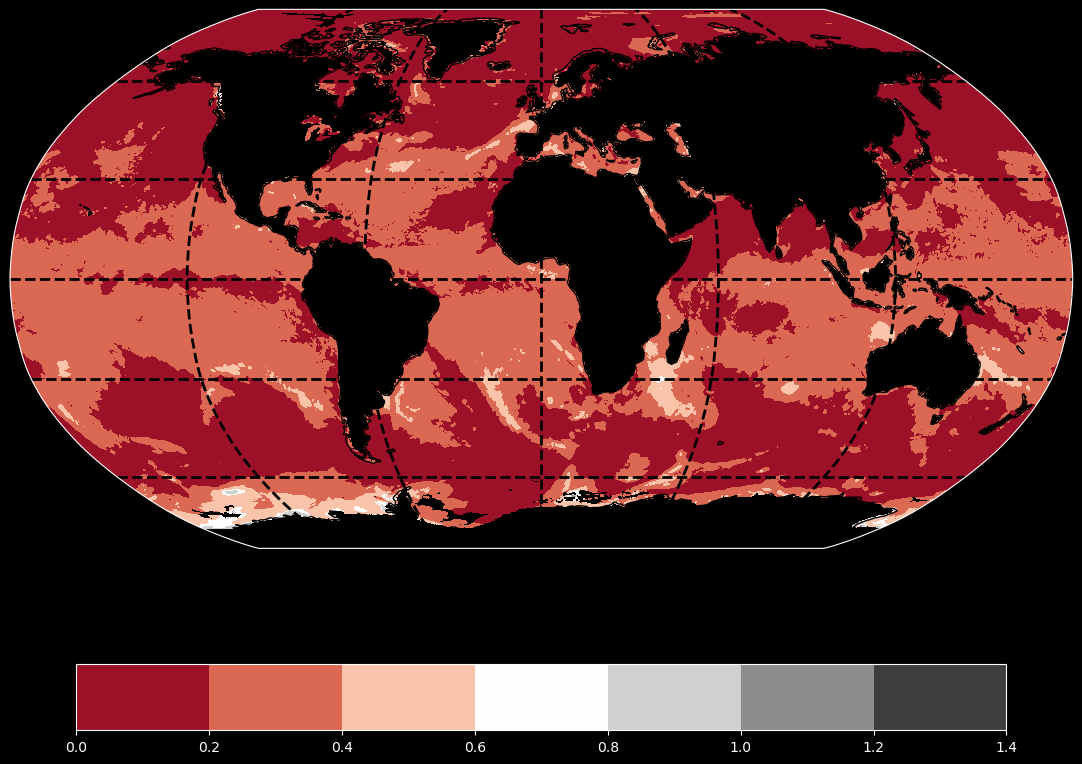

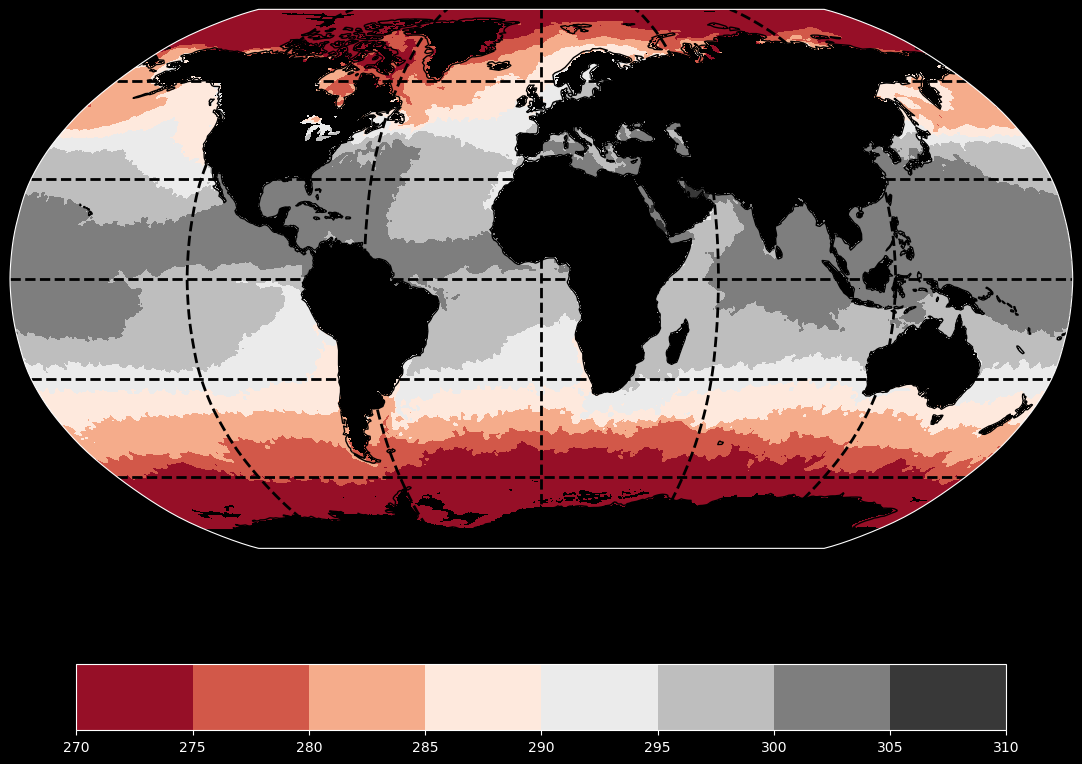

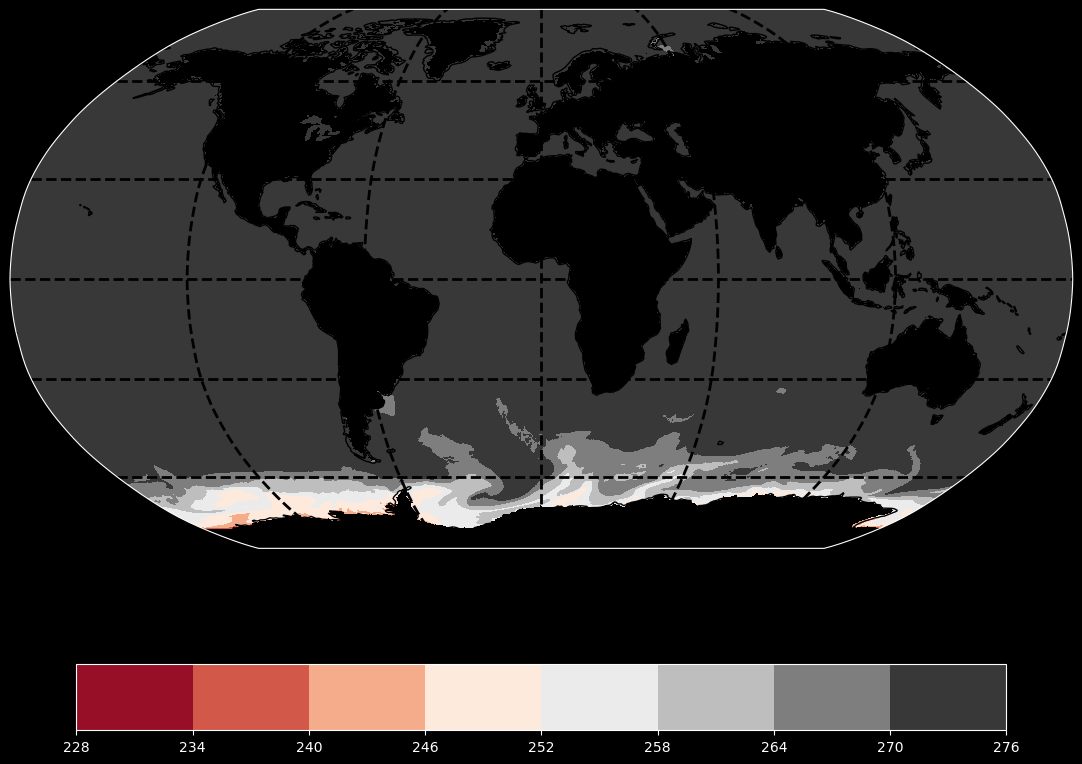

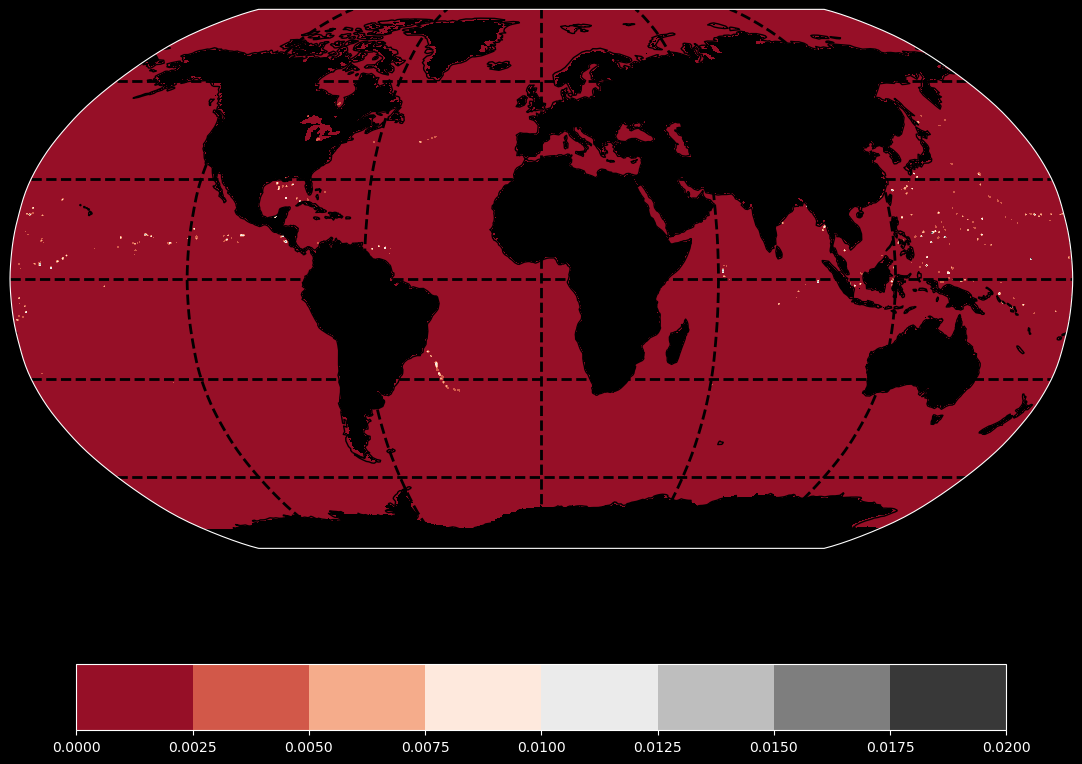

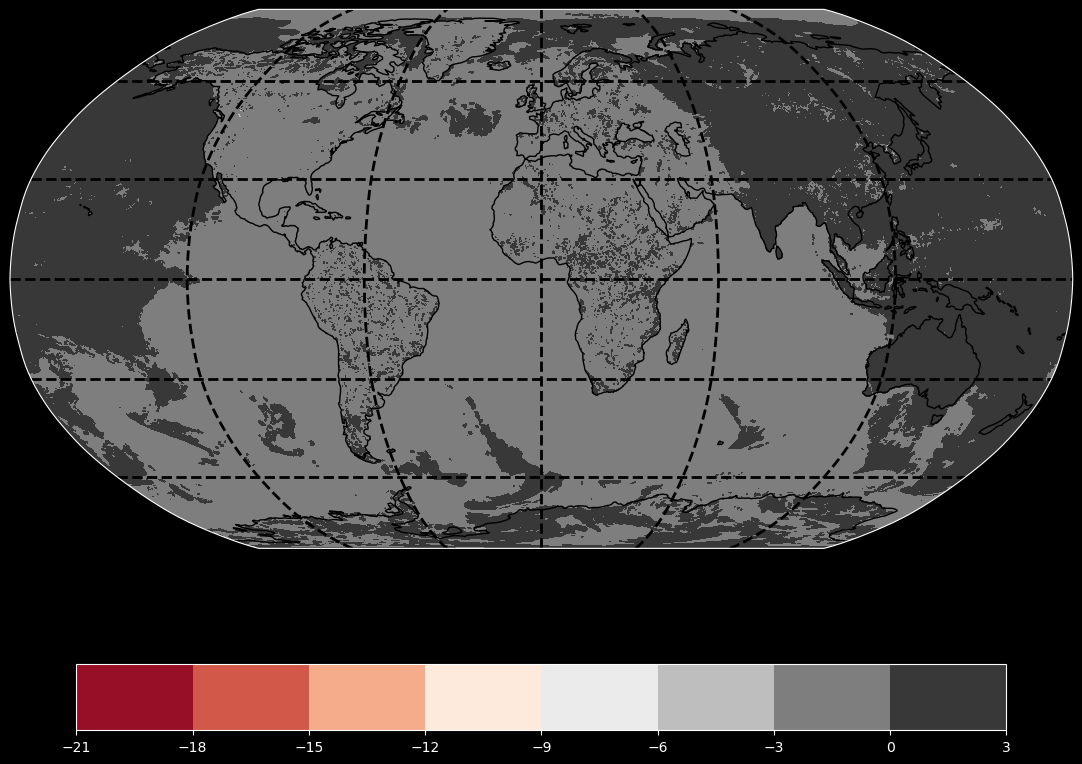

In [12]:
for x_climate_param, x_param_name in zip(GENERAL_PARAMS_2018, GENERAL_KEY_LIST):
    
    figure        = plt.figure(figsize  = (15, 10))
    axis_func     = plt.axes(projection = ccrs.Robinson()) 
    
    axis_func.set_global()
    axis_func.coastlines(resolution = "110m", linewidth = 1)
    axis_func.gridlines(linestyle   = '--'  , color     = 'black', linewidth = 2)
    
    plt.contourf(_2018_LON, _2018_LAT, x_climate_param, 
             transform = ccrs.PlateCarree(), cmap = 'RdGy')
    
    colorbar_func = plt.colorbar(ax     = axis_func, orientation = 'horizontal',
                                 aspect =        14, shrink = 0.8, extend = 'max')
    colorbar_func.ax.tick_params(labelsize = 10)
    

    
    